In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd


file_path = '/content/drive/MyDrive/cs-project dataset/soil fertility data.csv'
df = pd.read_csv(file_path)
df.head()


,N,ph,sand,silt,cec,bulk density,clay,soc,fertility
0,138,7.46,70.79417,30.293500,27.964874,1.615436,35.369125,0.70,0
1,213,7.62,70.87520,30.041927,27.964874,1.615436,35.503357,1.06,0
2,163,7.59,70.14587,32.473793,28.522726,1.615436,34.093960,1.11,0
3,157,7.64,69.82172,33.312370,28.801651,1.615436,33.825500,0.94,0
4,220,7.43,70.14587,33.228510,28.894629,1.615436,33.557050,0.72,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             1288 non-null   int64  
 1   ph            1288 non-null   float64
 2   sand          1288 non-null   float64
 3   silt          1288 non-null   float64
 4   cec           1288 non-null   float64
 5   bulk density  1288 non-null   float64
 6   clay          1288 non-null   float64
 7   soc           1288 non-null   float64
 8   fertility     1288 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 90.7 KB


In [ ]:
df.describe()

,N,ph,sand,silt,cec,bulk density,clay,soc,fertility
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,7.549130,72.053327,30.913122,30.398473,1.627976,33.831548,0.632174,1.035714
std,80.542499,0.507163,2.173759,1.835678,3.258430,0.025487,2.156670,0.720488,0.810938
min,6.000000,0.900000,68.363045,25.681343,24.059917,1.555034,26.040268,0.100000,0.000000
25%,207.000000,7.340000,70.632095,29.538784,28.429752,1.611409,32.953020,0.390000,0.000000
50%,289.000000,7.500000,71.847650,30.628931,29.638428,1.623490,34.362415,0.620000,1.000000
75%,333.000000,7.700000,73.063210,32.222220,31.404959,1.643624,35.302013,0.832500,2.000000
max,383.000000,11.150000,80.356570,36.582810,42.469010,1.691946,38.389260,24.000000,2.000000


In [ ]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             1288 non-null   int64  
 1   ph            1288 non-null   float64
 2   sand          1288 non-null   float64
 3   silt          1288 non-null   float64
 4   cec           1288 non-null   float64
 5   bulk density  1288 non-null   float64
 6   clay          1288 non-null   float64
 7   soc           1288 non-null   float64
 8   fertility     1288 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 90.7 KB
None

Summary Statistics:
                 N           ph         sand         silt          cec  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean    269.061335     7.549130    72.053327    30.913122    30.398473   
std      80.542499     0.507163     2.173759     1.835678     3.258430   
min       6.000000     0.900000  

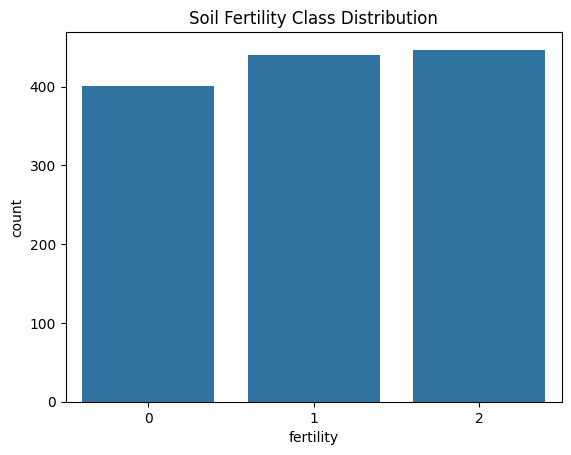

In [ ]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check class distribution
print("\nClass Distribution (Output):")
print(df['fertility'].value_counts())

# Visualize class distribution
sns.countplot(x='fertility', data=df)
plt.title('Soil Fertility Class Distribution')
plt.show()


# **Data Preprocessing**

In [ ]:
# Define features and target
X = df.drop(columns=['fertility'])
y = df['fertility']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for later use
joblib.dump(scaler, 'soil_scaler.pkl')


['soil_scaler.pkl']

# ***rf model training***

Accuracy of the Model: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.96      0.92      0.94        88
           2       0.95      0.99      0.97        90

    accuracy                           0.96       258
   macro avg       0.96      0.96      0.96       258
weighted avg       0.96      0.96      0.96       258


Confusion Matrix:


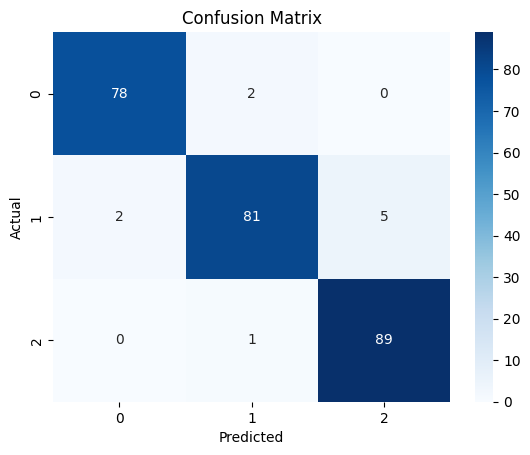

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'soil_fertility_model.pkl')
print("Model saved as 'soil_fertility_model.pkl'")


Model saved as 'soil_fertility_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the scaler and model
scaler = joblib.load('soil_scaler.pkl')
model = joblib.load('soil_fertility_model.pkl')

# Example input (replace with real values and ensure they match the feature names)
feature_names = ['N', 'ph', 'sand', 'silt', 'cec', 'bulk density', 'clay', 'soc']
example_input = pd.DataFrame([[138,7.46,70.79, 30.29, 27.96, 1.615, 35.37, 0.7]],
                             columns=feature_names)

# Scale the input
scaled_input = scaler.transform(example_input)

# Make prediction
prediction = model.predict(scaled_input)
print(f"Predicted Output (Soil Fertility): {prediction[0]}")

# Map predictions to descriptive labels and crop recommendations
fertility_mapping = {
    0: {"status": "Low Soil Fertility",
        "crops": ["Millets", "Sorghum", "Legumes", "Cassava"]},
    1: {"status": "Moderate Soil Fertility",
        "crops": ["Maize", "Wheat", "Barley", "Groundnuts"]},
    2: {"status": "Highly Fertile Soil",
        "crops": ["Rice", "Sugarcane", "Vegetables", "Fruits"]}
}

# Get the descriptive result and recommended crops
fertility_status = fertility_mapping.get(prediction[0], {"status": "Unknown", "crops": []})
status = fertility_status["status"]
recommended_crops = fertility_status["crops"]

# Display the result
print(f"Predicted Soil Fertility: {status}")
print("Recommended Crops:")
for crop in recommended_crops:
    print(f"- {crop}")


Predicted Output (Soil Fertility): 0
Predicted Soil Fertility: Low Soil Fertility
Recommended Crops:
- Millets
- Sorghum
- Legumes
- Cassava


# **Gradient Boosting Model**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Define features (X) and target (y)
features = ['N', 'ph', 'sand', 'silt', 'clay', 'cec', 'bulk density', 'soc']
X = df[features]
y = df['fertility']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9612403100775194

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.96      0.93      0.95        87
           2       0.93      0.99      0.96        85

    accuracy                           0.96       258
   macro avg       0.96      0.96      0.96       258
weighted avg       0.96      0.96      0.96       258


Confusion Matrix:
 [[83  2  1]
 [ 1 81  5]
 [ 0  1 84]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
features = ['N', 'ph', 'sand', 'silt', 'clay', 'cec', 'bulk density', 'soc']
X = df[features]
y = df['fertility']


# Initialize Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Save the best model using joblib
joblib.dump(best_model, "best_gradient_boosting_model.joblib")
print("Model saved as 'best_gradient_boosting_model.joblib'")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Model saved as 'best_gradient_boosting_model.joblib'

Test Accuracy: 0.9767441860465116

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        86
           1       0.99      0.95      0.97        87
           2       0.94      1.00      0.97        85

    accuracy                           0.98       258
   macro avg       0.98      0.98      0.98       258
weighted avg       0.98      0.98      0.98       258



In [ ]:
from sklearn.metrics import log_loss, accuracy_score
import numpy as np

# Assuming `X_test` and `y_test` are your validation features and labels
validation_loss = []
validation_accuracy = []

# Loop through each stage (iteration) of the trained model
for probas in best_model.staged_predict_proba(X_test):
    # Compute log-loss
    loss = log_loss(y_test, probas)
    validation_loss.append(loss)

# Loop through each stage for staged predictions
for preds in best_model.staged_predict(X_test):
    # Compute accuracy
    acc = accuracy_score(y_test, preds)
    validation_accuracy.append(acc)


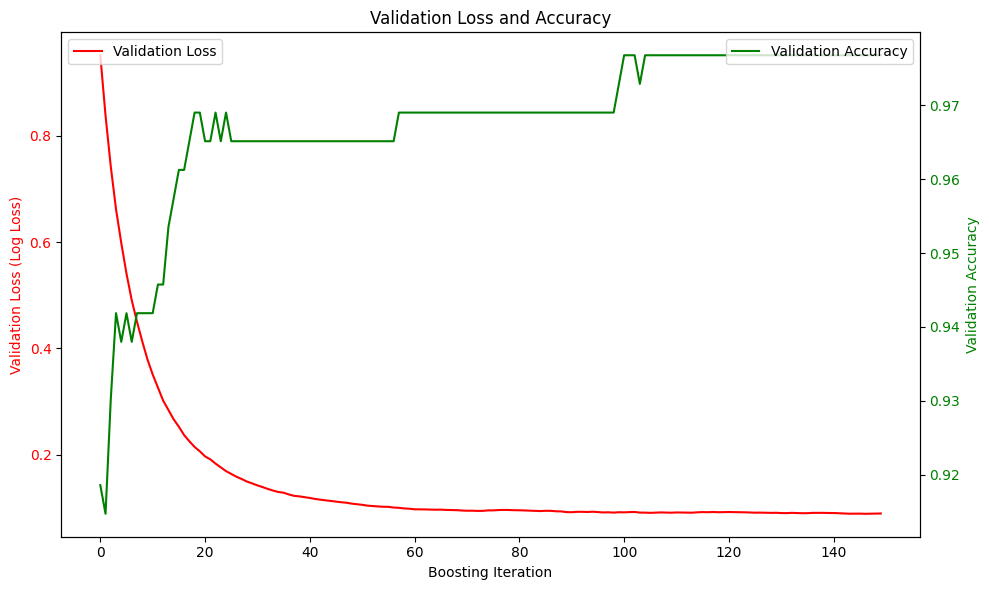

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Validation Loss
color = 'red'
ax1.set_xlabel('Boosting Iteration')
ax1.set_ylabel('Validation Loss (Log Loss)', color=color)
ax1.plot(validation_loss, label='Validation Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for Validation Accuracy
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(validation_accuracy, label='Validation Accuracy', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add a title
plt.title('Validation Loss and Accuracy')

# Show the plot
plt.tight_layout()
plt.show()


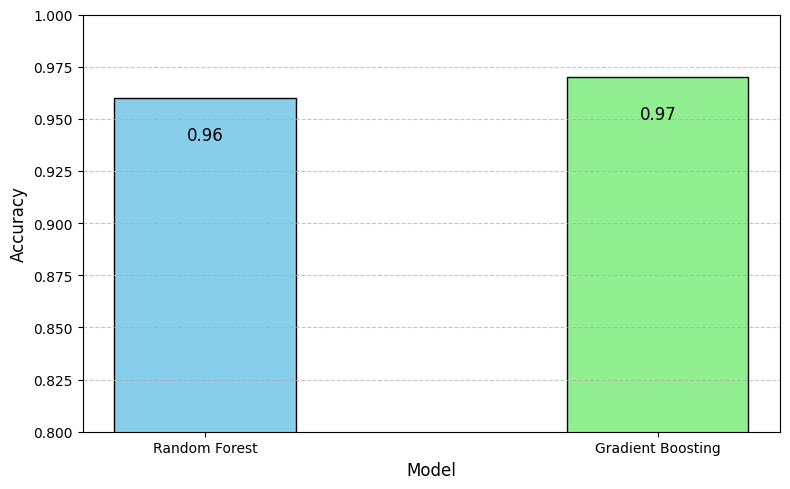

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
model_names = ['Random Forest', 'Gradient Boosting']
accuracies = [0.96, 0.97]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen'], edgecolor='black', width=0.4)

# Add titles and labels
#plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Annotate bars with accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy - 0.02, f'{accuracy:.2f}', ha='center', fontsize=12, color='black')

# Set y-axis limits and grid
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3495 - loss: 1.1204 - val_accuracy: 0.8107 - val_loss: 0.8750
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6777 - loss: 0.8727 - val_accuracy: 0.8398 - val_loss: 0.6867
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.7035 - val_accuracy: 0.8786 - val_loss: 0.5382
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.6159 - val_accuracy: 0.8932 - val_loss: 0.4365
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8397 - loss: 0.5023 - val_accuracy: 0.9078 - val_loss: 0.3796
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.4893 - val_accuracy: 0.9078 - val_loss: 0.3484
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.4497 - val_accuracy: 0.9078 - val_loss: 0.3335
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.4534 - val_accuracy: 0.9126 - val_loss

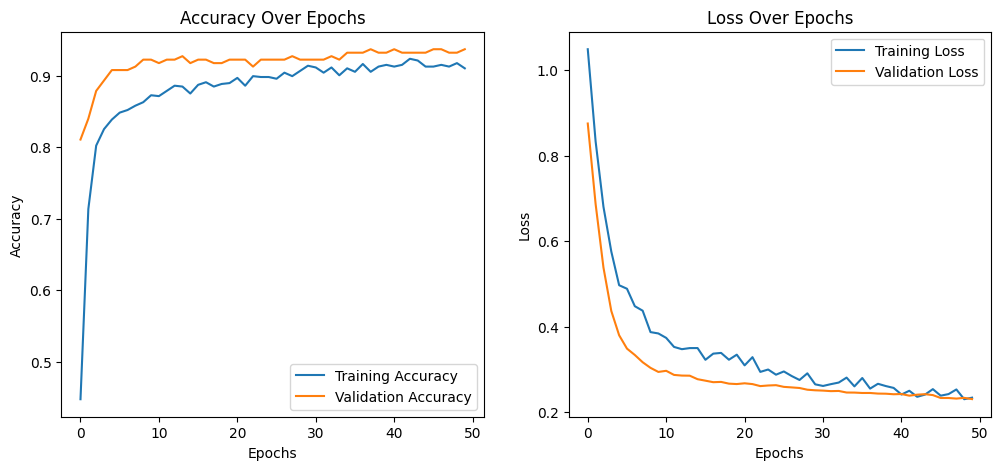

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/cs-project dataset/soil fertility data.csv')

# Features and target
# Update the feature columns and target column as per your dataset
X = data[['N', 'ph', 'sand', 'silt', 'clay', 'cec', 'bulk density', 'soc']]
y = pd.get_dummies(data['fertility'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()



In [5]:
# Save the model in the native Keras format
model.save('/content/drive/MyDrive/cs-project dataset/soil_fertility_model.keras')
print("Model saved successfully as soil_fertility_model.keras")


Model saved successfully as soil_fertility_model.keras
